In [126]:
# %pip install pandas 
# %pip install matplotlib 
# %pip install seaborn
# %pip install scikit-learn

In [19]:
# Importação das dependencias

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [4]:
filename = 'table_values_csv.csv'
df = pd.read_csv(filename, sep=',',low_memory=False)
display(df.head())

,id_x,due_date,new_due_date,created_at,updated_at,number,value,nfe_number,nfe_series,kind_x,...,document_number,authorized_third_party_id,company_name,kind_y,paymaster_id,ballast_kind,invoice_number,payment_place,update_reason_kind,finished_at
0,b13369ca-e3de-451c-bfa0-2c2c06db00da,2023-08-05,2023-08-05,2023-07-12 13:38:12.047933,2023-07-12 13:38:12.061655,003123,0.01,523451,6,services,...,1.394248e+13,NaN,"Ramalho, Macieira e Caldeira",registration_participant,NaN,invoice,123123,São Paulo,others,NaN
1,c2f7a256-7165-4787-966e-e094344827d8,2024-03-23,2024-03-23,2024-02-07 19:34:32.485735,2024-02-07 19:34:32.485735,2,2014.09,000005010,001,goods,...,1.394248e+13,NaN,"Ramalho, Macieira e Caldeira",registration_participant,NaN,nfe_key,NaN,BA,others,NaN
2,1bedeb72-2413-43ec-95a9-c6b539ce6a99,2024-01-17,2024-01-17,2023-12-20 13:22:01.374323,2023-12-20 13:22:01.374323,1,1047.74,000038412,001,goods,...,9.153087e+13,NaN,Gabeira-Mangueira,registration_participant,NaN,nfe_key,NaN,RN,NaN,NaN
3,ac2d5831-fdd6-44c5-8b07-01faa04dc451,2023-07-31,2023-07-31,2023-06-29 17:54:29.988490,2023-06-29 17:54:29.988490,3932,59.83,3932,1,goods,...,9.409448e+13,NaN,Cardoso LTDA,registration_participant,NaN,nfe_key,NaN,teste,operational_error,NaN
4,dacc7c5a-accb-430b-8d51-5aceb572e2c4,2033-08-05,2033-08-05,2024-02-07 18:56:32.251144,2024-02-07 18:56:32.256128,910304872,0.01,910304872,910304872,goods,...,1.394248e+13,NaN,"Ramalho, Macieira e Caldeira",registration_participant,NaN,nfe_key,NaN,São Paulo,others,NaN


In [5]:
# Dropando colunas desnecessaria ou com muito nulos
df=df.drop(columns=['id_x', 'number', 'new_due_date', 'nfe_number', 'nfe_series', 'contact_phone_number_x', 'contact_phone_number_y', 'contact_phone_number', 'contact_email_x', 'finished_at', 'created_at_x', 'updated_at_x', 'new_due_date.1', 'contact_email_y', 'created_at_y', 'updated_at_y', 'invoice_number', 'authorized_third_party_id', 'paymaster_id', 'update_reason_kind' ], axis=1)

In [6]:
# Converter colunas de datas para o tipo datetime
df['due_date'] = pd.to_datetime(df['due_date'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181239 entries, 0 to 181238
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   due_date              181239 non-null  datetime64[ns]
 1   created_at            181239 non-null  datetime64[ns]
 2   updated_at            181239 non-null  datetime64[ns]
 3   value                 181239 non-null  float64       
 4   kind_x                181239 non-null  object        
 5   state_x               181239 non-null  object        
 6   payer_id              181239 non-null  object        
 7   name_x                181239 non-null  object        
 8   document_number_x     181239 non-null  int64         
 9   type_x                181239 non-null  object        
 10  endorser_original_id  181239 non-null  object        
 11  name_y                181239 non-null  object        
 12  document_number_y     181239 non-null  int64         
 13 

In [7]:
# Remover linhas com valores nulos nas colunas específicas
df_cleaned = df.dropna(subset=['participant_id_x', 'name', 'state_y', 'document_number', 'company_name', 'kind_y'])
df = df_cleaned
df.isna().sum()

due_date                0
created_at              0
updated_at              0
value                   0
kind_x                  0
state_x                 0
payer_id                0
name_x                  0
document_number_x       0
type_x                  0
endorser_original_id    0
name_y                  0
document_number_y       0
type_y                  0
participant_id_x        0
name                    0
state_y                 0
document_number         0
company_name            0
kind_y                  0
ballast_kind            0
payment_place           0
dtype: int64

In [8]:
# Converter a coluna para inteiros
df['document_number_x'] = df['document_number_x'].astype(int)
df['document_number_y'] = df['document_number_y'].astype(int)
df['document_number'] = df['document_number'].astype(int)

In [9]:
# Agrupamento por payer_id
df_payer = df.groupby('document_number_x').agg(
    total_canceladas_payer=('state_x', lambda x: (x == 'canceled').sum()),
    total_ativas_payer=('state_x', lambda x: (x == 'active').sum()),
    total_finalizadas_payer=('state_x', lambda x: (x == 'finished').sum()),
    total_valor_payer=('value', 'sum')
).reset_index()
display(df_payer)

,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
0,49445260,0,6,0,985.98
1,81290101,0,1,0,2486.05
2,133816524,0,3,0,673.00
3,181509504,0,1,0,307.53
4,354250167,0,2,0,38360.00
...,...,...,...,...,...
9932,97837181005378,0,9,0,79603.20
9933,97837181005610,0,1,0,14196.00
9934,98047730000142,0,1,0,1999.99
9935,98102650000142,0,2,0,38906.88


In [10]:
#Top 1 canceladas
top_1_payer_c = df_payer.nlargest(1, 'total_canceladas_payer')
display(top_1_payer_c)

#Top 1 atrivas
top_1_payer_a = df_payer.nlargest(1, 'total_ativas_payer')
display(top_1_payer_a)

#Top 1 finalizadas
top_1_payer_f = df_payer.nlargest(1, 'total_finalizadas_payer')
display(top_1_payer_f)

#Top 1 valor
top_1_payer_v = df_payer.nlargest(1, 'total_valor_payer')
display(top_1_payer_v)

,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
16,1233353020,42371,109822,6,2802.36


,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
16,1233353020,42371,109822,6,2802.36


,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
155,11091007870,48,144,19,16075.97


,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
8694,49208067000105,0,30,0,1.903632e+08


In [11]:
#Dropando o dado com mais casos
df_payer = df_payer[~df_payer['document_number_x'].isin(top_1_payer_c['document_number_x'])]
df_payer = df_payer[~df_payer['document_number_x'].isin(top_1_payer_a['document_number_x'])]
df_payer = df_payer[~df_payer['document_number_x'].isin(top_1_payer_f['document_number_x'])]
df_payer = df_payer[~df_payer['document_number_x'].isin(top_1_payer_v['document_number_x'])]

top_1_payer_c = df_payer.nlargest(1, 'total_canceladas_payer')
top_1_payer_a = df_payer.nlargest(1, 'total_ativas_payer')
top_1_payer_f = df_payer.nlargest(1, 'total_finalizadas_payer')
top_1_payer_v = df_payer.nlargest(1, 'total_valor_payer')
display(top_1_payer_c)
display(top_1_payer_a)
display(top_1_payer_f)
display(top_1_payer_v)

,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
3407,10853114000138,48,4,0,299190.96


,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
4512,16701716000156,0,303,0,3755499.08


,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
1315,3813865000165,0,1,16,21440.93


,document_number_x,total_canceladas_payer,total_ativas_payer,total_finalizadas_payer,total_valor_payer
4512,16701716000156,0,303,0,3755499.08


In [12]:
# Agrupar por endorser_original_id
df_endorser = df.groupby('document_number_y').agg(
    total_canceladas_endorser=('state_x', lambda x: (x == 'canceled').sum()),
    total_ativas_endorser=('state_x', lambda x: (x == 'active').sum()),
    total_finalizadas_endorser=('state_x', lambda x: (x == 'finished').sum()),
    total_valor_endorser=('value', 'sum')
).reset_index()
display(df_endorser)

,document_number_y,total_canceladas_endorser,total_ativas_endorser,total_finalizadas_endorser,total_valor_endorser
0,2796133001,0,0,1,150.00
1,9526874960,0,1,0,101.11
2,11091007870,1,2,2,900.08
3,11661181856,0,1,0,1500.00
4,13994932050,0,1,0,4560.00
...,...,...,...,...,...
615,93999391000180,0,0,1,1200.00
616,94043346000110,0,0,1,500.00
617,94476645000220,0,6,0,134387.00
618,95756110000194,0,21,0,235557.37


In [13]:
#Top 1 canceladas
top_1_endorser_c = df_endorser.nlargest(1, 'total_canceladas_endorser')
display(top_1_endorser_c)

#Top 1 atrivas
top_1_endorser_a = df_endorser.nlargest(1, 'total_ativas_endorser')
display(top_1_endorser_a)

#Top 1 finalizadas
top_1_endorser_f = df_endorser.nlargest(1, 'total_finalizadas_endorser')
display(top_1_endorser_f)

#Top 1 valor
top_1_endorser_v = df_endorser.nlargest(1, 'total_valor_endorser')
display(top_1_endorser_v)

,document_number_y,total_canceladas_endorser,total_ativas_endorser,total_finalizadas_endorser,total_valor_endorser
106,5570714000825,42371,109433,6,1936.77


,document_number_y,total_canceladas_endorser,total_ativas_endorser,total_finalizadas_endorser,total_valor_endorser
106,5570714000825,42371,109433,6,1936.77


,document_number_y,total_canceladas_endorser,total_ativas_endorser,total_finalizadas_endorser,total_valor_endorser
473,42236930000199,0,471,68,5478586.78


,document_number_y,total_canceladas_endorser,total_ativas_endorser,total_finalizadas_endorser,total_valor_endorser
330,22682593000156,0,30,0,1.903632e+08


In [14]:
#Dropando o dado com mais casos
df_endorser = df_endorser[~df_endorser['document_number_y'].isin(top_1_endorser_c['document_number_y'])]
df_endorser = df_endorser[~df_endorser['document_number_y'].isin(top_1_endorser_a['document_number_y'])]
df_endorser = df_endorser[~df_endorser['document_number_y'].isin(top_1_endorser_f['document_number_y'])]
df_endorser = df_endorser[~df_endorser['document_number_y'].isin(top_1_endorser_v['document_number_y'])]

top_1_payer_c = df_endorser.nlargest(1, 'total_canceladas_endorser')
top_1_payer_a = df_endorser.nlargest(1, 'total_ativas_endorser')
top_1_payer_f = df_endorser.nlargest(1, 'total_finalizadas_endorser')
top_1_payer_v = df_endorser.nlargest(1, 'total_valor_endorser')
display(top_1_payer_c)
display(top_1_payer_a)
display(top_1_payer_f)
display(top_1_payer_v)

,document_number_y,total_canceladas_endorser,total_ativas_endorser,total_finalizadas_endorser,total_valor_endorser
19,358491000309,125,73,0,82293.94


,document_number_y,total_canceladas_endorser,total_ativas_endorser,total_finalizadas_endorser,total_valor_endorser
64,2907226000104,0,1375,0,710859.19


,document_number_y,total_canceladas_endorser,total_ativas_endorser,total_finalizadas_endorser,total_valor_endorser
495,44696747000100,0,115,27,808461.41


,document_number_y,total_canceladas_endorser,total_ativas_endorser,total_finalizadas_endorser,total_valor_endorser
166,8899707000193,0,129,7,24480716.21


In [15]:
# Renomear colunas para manter consistência
df_payer = df_payer.rename(columns={'document_number_x': 'document_number', 'total_canceladas_payer': 'total_canceladas', 'total_ativas_payer': 'total_ativas', 'total_finalizadas_payer': 'total_finalizadas', 'total_valor_payer': 'total_valor'})
df_endorser = df_endorser.rename(columns={'document_number_y': 'document_number', 'total_canceladas_endorser': 'total_canceladas', 'total_ativas_endorser': 'total_ativas', 'total_finalizadas_endorser': 'total_finalizadas', 'total_valor_endorser': 'total_valor'})

# Concatenar as tabelas
df_consolidado = pd.concat([df_payer, df_endorser], ignore_index=True)
display(df_consolidado)

,document_number,total_canceladas,total_ativas,total_finalizadas,total_valor
0,49445260,0,6,0,985.98
1,81290101,0,1,0,2486.05
2,133816524,0,3,0,673.00
3,181509504,0,1,0,307.53
4,354250167,0,2,0,38360.00
...,...,...,...,...,...
10546,93999391000180,0,0,1,1200.00
10547,94043346000110,0,0,1,500.00
10548,94476645000220,0,6,0,134387.00
10549,95756110000194,0,21,0,235557.37


In [16]:
df_media_desvio = df_consolidado

# Valor Normalizado
# Normalização do valor_total
scaler = StandardScaler()
df_media_desvio['valor_normalizado'] = scaler.fit_transform(df_media_desvio[['total_valor']])


# Valor Logarizado
# Aplicar a transformação logarítmica ao valor_total
df_media_desvio['valor_log'] = np.log1p(df_media_desvio['total_valor'])
display(df_media_desvio['valor_log'])

# Valor Categorico
bins = [0, 1000, 10000, 50000, 100000, 1000000, np.inf]
labels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
df_media_desvio['total_valor_categoria'] = pd.cut(df_media_desvio['total_valor'], bins=bins, labels=labels)
df_media_desvio['total_valor_categoria'] = df_media_desvio['total_valor_categoria'].astype(float)

# SCORE Categorico
# df_media_desvio['score'] = (
#     (df_media_desvio['total_finalizadas'] * 0.7) +  # 70% finalizadas
#     (df_media_desvio['total_ativas'] * 0.05) +    # 1% ativas  
#     (df_media_desvio['total_valor_categoria'] * 0.25) - # 30% valor  total_valor_categoria
#     (df_media_desvio['total_canceladas'] * 0.5) # 50% canceladas
# )

# # SCORE Noralizado
# df_media_desvio['score'] = (
#     (df_media_desvio['total_finalizadas'] * 0.5) +   # Peso 50% para finalizadas
#     (df_media_desvio['total_ativas'] * 0.05) +       # Peso 5% para ativas
#     (df_media_desvio['valor_normalizado'] * 0.45) -  # Peso 45% para valor normalizado
#     (df_media_desvio['total_canceladas'] * 0.5)      # Peso 50% para canceladas
# )

# # SCORE Logarizado
df_media_desvio['score'] = (
    ((df_media_desvio['total_finalizadas'] * 0.77) +   # Peso 50% para finalizadas
    (df_media_desvio['total_ativas'] * 0.015) +       # Peso 5% para ativas
    (df_media_desvio['valor_log'] * 0.27)) -  # Peso 45% para valor normalizado
    (df_media_desvio['total_canceladas'] * 0.10)      # Peso 50% para canceladas
)


# Normalizando o score para uma escala percentual
df_media_desvio['score_percentage'] = (
    (df_media_desvio['score'] - df_media_desvio['score'].min()) /
    (df_media_desvio['score'].max() - df_media_desvio['score'].min()) * 
    100
)
# Exibir a tabela
display(df_media_desvio[['score', 'score_percentage']])


# # Aplicar a transformação logarítmica ao score
# df_media_desvio['score_log'] = np.log1p(df_media_desvio['score'])  # log(1 + x) para evitar log(0)

# # Normalizar o score logarítmico
# df_media_desvio['score_percentage_log'] = (df_media_desvio['score_log'] - df_media_desvio['score_log'].min()) / (df_media_desvio['score_log'].max() - df_media_desvio['score_log'].min()) * 100


display(df_media_desvio)

0         6.894650
1         7.818853
2         6.513230
3         5.731819
4        10.554797
           ...    
10546     7.090910
10547     6.216606
10548    11.808486
10549    12.369714
10550    11.164042
Name: valor_log, Length: 10551, dtype: float64

,score,score_percentage
0,1.951555,20.221442
1,2.126090,20.564075
2,1.803572,19.930934
3,1.562591,19.457860
4,2.879795,22.043686
...,...,...
10546,2.684546,21.660388
10547,2.448484,21.196971
10548,3.278291,22.825981
10549,3.654823,23.565156


,document_number,total_canceladas,total_ativas,total_finalizadas,total_valor,valor_normalizado,valor_log,total_valor_categoria,score,score_percentage
0,49445260,0,6,0,985.98,-0.118062,6.894650,0.1,1.951555,20.221442
1,81290101,0,1,0,2486.05,-0.113479,7.818853,0.2,2.126090,20.564075
2,133816524,0,3,0,673.00,-0.119018,6.513230,0.1,1.803572,19.930934
3,181509504,0,1,0,307.53,-0.120135,5.731819,0.1,1.562591,19.457860
4,354250167,0,2,0,38360.00,-0.003871,10.554797,0.3,2.879795,22.043686
...,...,...,...,...,...,...,...,...,...,...
10546,93999391000180,0,0,1,1200.00,-0.117408,7.090910,0.2,2.684546,21.660388
10547,94043346000110,0,0,1,500.00,-0.119547,6.216606,0.1,2.448484,21.196971
10548,94476645000220,0,6,0,134387.00,0.289527,11.808486,0.5,3.278291,22.825981
10549,95756110000194,0,21,0,235557.37,0.598639,12.369714,0.5,3.654823,23.565156


In [117]:
df_media_desvio=df_media_desvio.drop(columns=[ 'document_number'], axis=1)

In [17]:
# Regressão

# Definindo as variáveis preditoras (features) e a variável alvo (target)
X = df_media_desvio[['total_canceladas', 'total_ativas', 'total_finalizadas', 'valor_log']]
y = df_media_desvio['score_percentage'] # score_percentage

# Separar os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de árvore de decisão
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = tree_model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.9183309249276366
R² Score: 0.8853704952027543


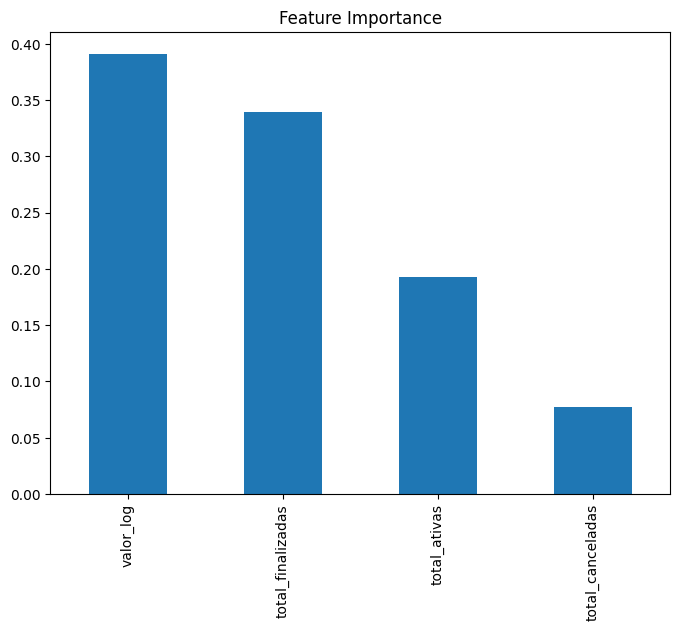

In [20]:
# Visualizando a importância das features
feature_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(8,6))
plt.title('Feature Importance')
plt.show()

In [362]:
# Teste modelo arvore de decisão

# Efeitos comparativos do total_valor_categoria
# total_valor_categoria =   0.1 = [0, 1000], 
                #           0.2 = [1000, 10000], 
                #           0.3 = [10000, 50000], 
                #           0.4 = [50000, 100000], 
                #           0.5 = [100000, 1000000], 
                #           0.6 = [1000000, np.inf]

# Efeitos comparativos do score
# df_media_desvio['score'] = (
#     (df_media_desvio['total_finalizadas'] * 0.5) +  
#     (df_media_desvio['total_ativas'] * 0.3) +       
#     (df_media_desvio['total_valor_categoria'] * 0.2) -
#     (df_media_desvio['total_canceladas'] * 0.5) 
# )

# # Normalizando o score para uma escala percentual
# df_media_desvio['score_percentage'] = (df_media_desvio['score'] - df_media_desvio['score'].min()) / (df_media_desvio['score'].max() - df_media_desvio['score'].min()) * 100



#Dados que chegam o modelo a 100%
new_data1 = {
    'total_canceladas': [0],
    'total_ativas': [0],
    'total_finalizadas': [10000],
    'total_valor_categoria': [0.6]    
}

#Dados que chegam o modelo a 50%
new_data2 = {
    'total_canceladas': [0],
    'total_ativas': [10],
    'total_finalizadas': [300000],
    'valor_log': [50000]    
}

# Convertendo o dicionário para um DataFrame para o modelo fazer previsões
new_df = pd.DataFrame(new_data2)

# scaler = StandardScaler()
# new_df['valor_normalizado'] = scaler.fit_transform(new_df[['valor_normalizado']])

new_df['valor_log'] = np.log1p(new_df['valor_log'])

# Fazer a previsão do score para esses novos dados
predicted_score = tree_model.predict(new_df)

# Exibir a previsão
print(f'O score previsto para os novos dados é: {predicted_score[0]}')

O score previsto para os novos dados é: 57.92474082104031


In [ ]:
#65.97113361991154


In [18]:
# Modelo Random Forest:
from sklearn.ensemble import RandomForestRegressor

# Criar e treinar o modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliar o modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R² Score: {r2_rf}')

Random Forest - Mean Squared Error: 1.0670484742780475
Random Forest - R² Score: 0.8668070138106397


In [236]:
# Teste modelo Random Forest

# Efeitos comparativos do total_valor_categoria

# total_valor_categoria =   0.1 = [0, 1000], - 1.000
                #           0.2 = [1000, 10000], - 10.000
                #           0.3 = [10000, 50000], - 50.000
                #           0.4 = [50000, 100000], - 100.000
                #           0.5 = [100000, 1000000], - 1000.000
                #           0.6 = [1000000, np.inf] - infinito

# Efeitos comparativos do score
# df_media_desvio['score'] = (
#     (df_media_desvio['total_finalizadas'] * 0.5) +  
#     (df_media_desvio['total_ativas'] * 0.1) +       
#     (df_media_desvio['total_valor_categoria'] * 0.3) -
#     (df_media_desvio['total_canceladas'] * 0.5) 
# )

# # Normalizando o score para uma escala percentual
# df_media_desvio['score_percentage'] = (df_media_desvio['score'] - df_media_desvio['score'].min()) / (df_media_desvio['score'].max() - df_media_desvio['score'].min()) * 100


new_data1 = {
    'total_canceladas': 0,
    'total_ativas': 2000,
    'total_finalizadas': 5000,
    'total_valor_categoria': 0.6
}

#Dados que chegam o modelo a 50%
new_data2 = {
    'total_canceladas': 10,
    'total_ativas': 1000,
    'total_finalizadas': 10,
    'valor_log': 10000000   
}

new_data_df = pd.DataFrame([new_data2])

# scaler = StandardScaler()
# new_df['valor_normalizado'] = scaler.fit_transform(new_df[['valor_normalizado']])

new_data_df['valor_log'] = np.log1p(df_media_desvio['valor_log'])

# Fazendo a previsão usando o modelo Random Forest
predicted_score = rf_model.predict(new_data_df)

print(f'Previsão do score para os dados fictícios: {predicted_score[0]}')

Previsão do score para os dados fictícios: 77.20287184293994
